In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_context("talk")

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ls data

crime_astros_finalA.csv*   crime_rockets_finalB.csv*  crime_texans_final.csv*
crime_astros_finalB.csv*   crime_rockets_final.csv*   crime_uh_finalA.csv*
crime_astros_final.csv*    crime_ru_finalB.csv*       crime_uh_finalB.csv*
crime_dynamo_finalA.csv*   crime_ru_final.csv*        crime_uh_final.csv*
crime_dynamo_finalB.csv*   crime_ru_final.csvA.csv*   Position_Salaries.csv*
crime_dynamo_final.csv*    crime_texans_finalA.csv*
crime_rockets_finalA.csv*  crime_texans_finalB.csv*


In [3]:
path = 'data/crime_ru_finalB.csv'
team = 'Rice Football '
df = pd.read_csv(path)
#df.drop(['date','dist_stadium_meadian','premise_mode'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

nogame = df.game =='No Game'
df = df[~nogame]


#df.drop(['month','offense_mode'],axis=1,inplace=True) # 694
#df.drop(['month','offense_mode','premise_mode'],axis=1,inplace=True) # 313
#df.drop(['month','offense_mode','season'],axis=1,inplace=True) # 672
#df.drop(['offense_mode','season',],axis=1,inplace=True) # 788
#df.drop(['offense_mode','dist_stadium_meadian'],axis=1,inplace=True) # 704
#df.drop(['weekday','dist_stadium_meadian'],axis=1,inplace=True) # 75
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 323
#df.drop(['offense_mode','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 319
#df.drop(['offense_mode','premise_mode','season','dist_stadium_meadian'],axis=1,inplace=True) # 319
#df.drop(['offense_mode','season','premise_mode'],axis=1,inplace=True) # 347
#df.drop(['premise_mode','offense_mode'],axis=1,inplace=True) # 347
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) #  32

In [4]:
### get dummies
dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace("'", '') for c in dfd.columns]
dfd.columns = [c.replace(".", '') for c in dfd.columns]
dfd.columns = [c.replace("&", 'n') for c in dfd.columns]
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Saturday,weekday_Thursday,month_Dec,month_Nov,month_Oct,month_Sep,...,premise_mode_prk,premise_mode_rest_prk,premise_mode_store,premise_mode_store_prk,premise_mode_street,premise_mode_unk,offense_mode_Auto_Theft,offense_mode_Burglary,offense_mode_Theft,game_Won_Game
221,1,2010,0.344389,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
234,1,2010,0.827295,8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
241,1,2010,0.534264,15,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
248,2,2010,0.483141,6,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
261,1,2010,0.794013,19,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1


In [5]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula
#form = 'crime_total ~ hour_mode + year'
m = ols(form,dfd).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            crime_total   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1.266
Date:                Wed, 25 Jul 2018   Prob (F-statistic):              0.385
Time:                        23:12:34   Log-Likelihood:                -31.702
No. Observations:                  43   AIC:                             133.4
Df Residuals:                       8   BIC:                             195.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [6]:
df.head()

,crime_total,weekday,month,year,dist_stadium_meadian,season,part_day_mode,hour_mode,premise_mode,offense_mode,game
221,1,Saturday,Sep,2010,0.344389,Autumn,Night,0,driveway,Auto Theft,Lost Game
234,1,Saturday,Sep,2010,0.827295,Autumn,Morning,8,hospital,Theft,Lost Game
241,1,Saturday,Sep,2010,0.534264,Autumn,Afternoon,15,rest prk,Theft,Lost Game
248,2,Saturday,Oct,2010,0.483141,Autumn,Evening,6,store,Auto Theft,Lost Game
261,1,Saturday,Oct,2010,0.794013,Autumn,Evening,19,street,Theft,Won Game


## EDA & Summary Statistics

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


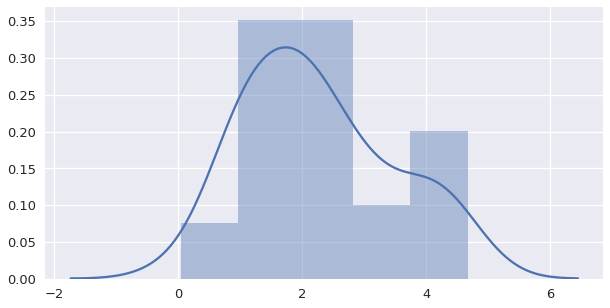

In [7]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(m.fittedvalues)
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


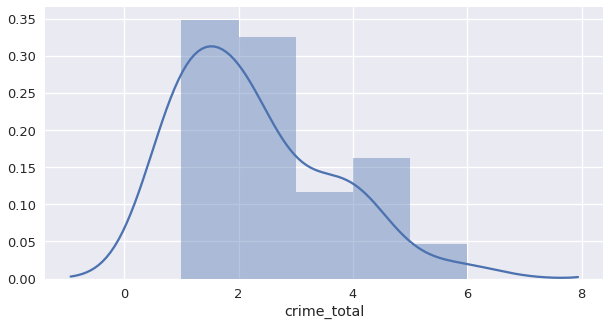

In [8]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(dfd['crime_total'])
plt.show()

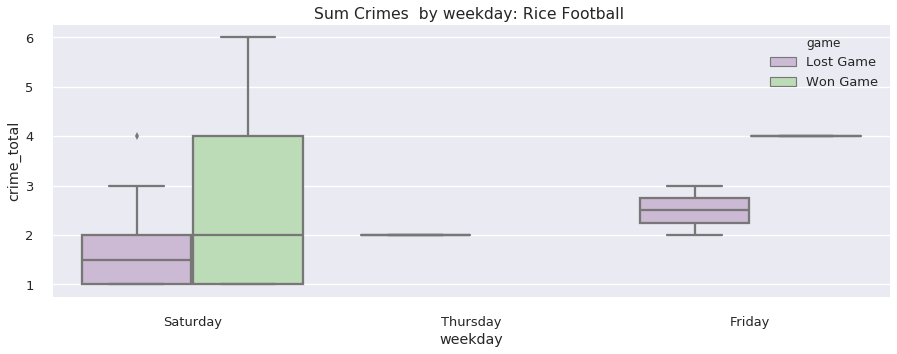

In [9]:
title = 'Sum Crimes  by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))


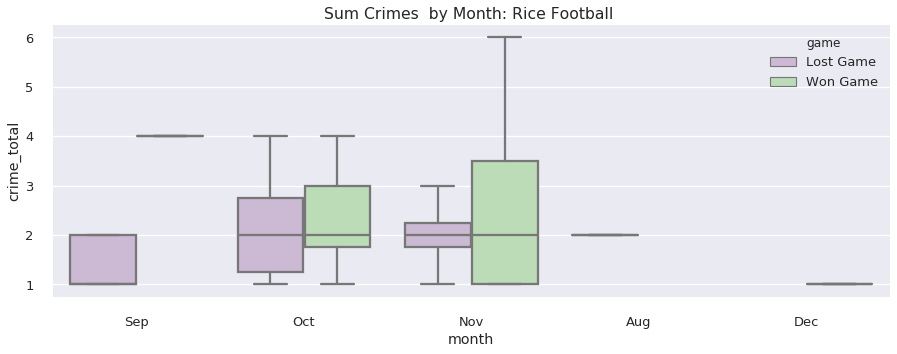

In [10]:
title = 'Sum Crimes  by Month: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="month", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

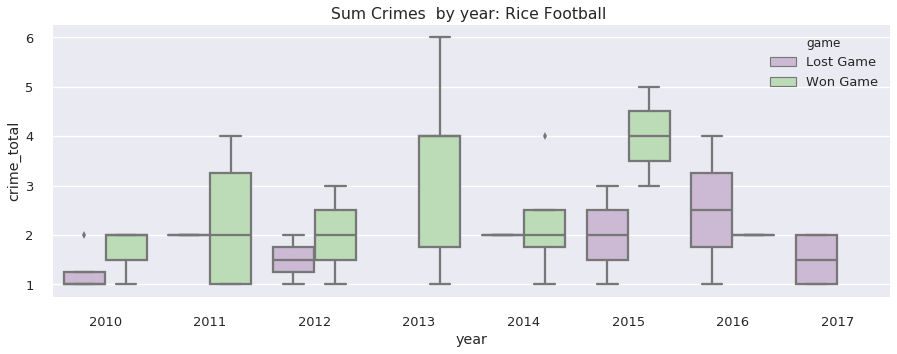

In [11]:
title = 'Sum Crimes  by year: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="year", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

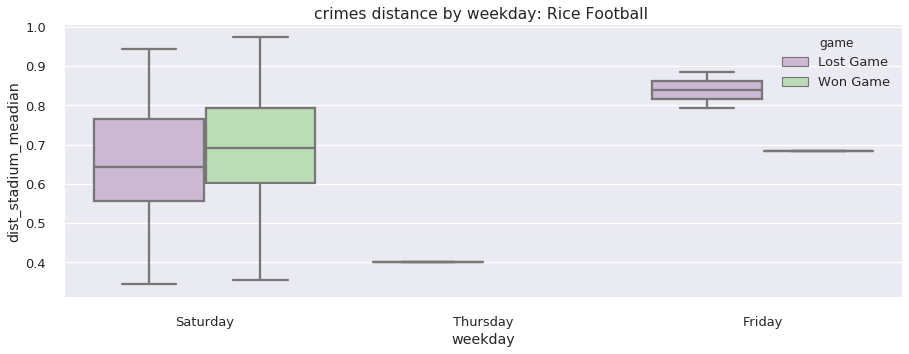

In [12]:
title = 'crimes distance by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="dist_stadium_meadian", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

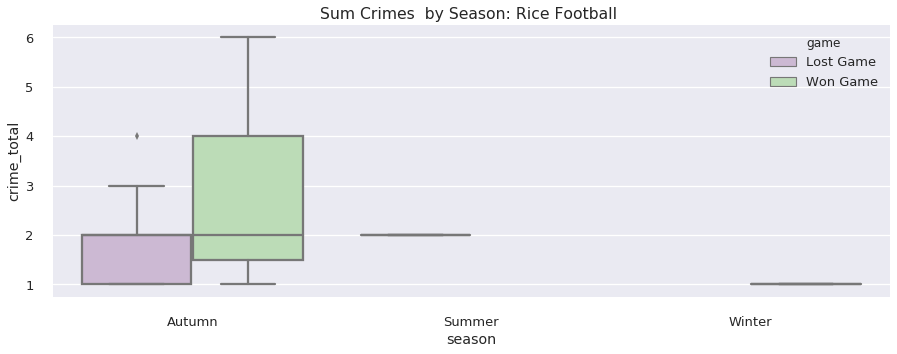

In [13]:
title = 'Sum Crimes  by Season: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="season", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

## Relationships

## linear regression

In [14]:
### get dummies

dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Saturday,weekday_Thursday,month_Dec,month_Nov,month_Oct,month_Sep,...,premise_mode_prk,premise_mode_rest_prk,premise_mode_store,premise_mode_store_prk,premise_mode_street,premise_mode_unk,offense_mode_Auto_Theft,offense_mode_Burglary,offense_mode_Theft,game_Won_Game
221,1,2010,0.344389,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
234,1,2010,0.827295,8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
241,1,2010,0.534264,15,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
248,2,2010,0.483141,6,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
261,1,2010,0.794013,19,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1


In [15]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total





form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            crime_total   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1.266
Date:                Wed, 25 Jul 2018   Prob (F-statistic):              0.385
Time:                        23:12:36   Log-Likelihood:                -31.702
No. Observations:                  43   AIC:                             133.4
Df Residuals:                       8   BIC:                             195.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [16]:
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
alg1 = LinearRegression(normalize=True)
alg2 = Ridge(alpha=0.1,normalize=True)
alg3 = Lasso(alpha=0.1,normalize=True)

In [18]:
def modelfit(alg, X,y):
    '''
    target = y
    predictors = X
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    #Fit the algorithm on the data
    alg.fit(X_train,y_train)
    #Predict training set:
    train_predictions = alg.predict(X_train)
    #Perform cross-validation:
    cv_score = cross_val_score(alg, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    print ("CV Score : Mean  %.4g | Std  %.4g | Min  %.4g | Max  %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
)


In [19]:
X_cols = list(X.columns)


Model Report
RMSE : 0.0716
CV Score : Mean  2.004e+14 | Std  4.137e+14 | Min  1.32 | Max  1.32e+15


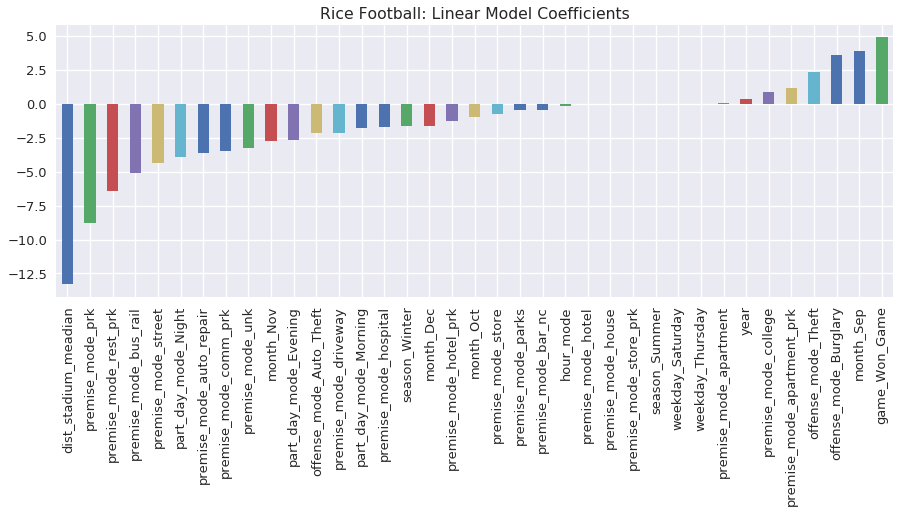

In [20]:
title = 'Rice Football: Linear Model Coefficients'
modelfit(alg1,X,y)
coef1 = pd.Series(alg1.coef_, X_cols).sort_values()
coef1.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 0.6496
CV Score : Mean  1.595 | Std  0.7066 | Min  0.2395 | Max  2.417


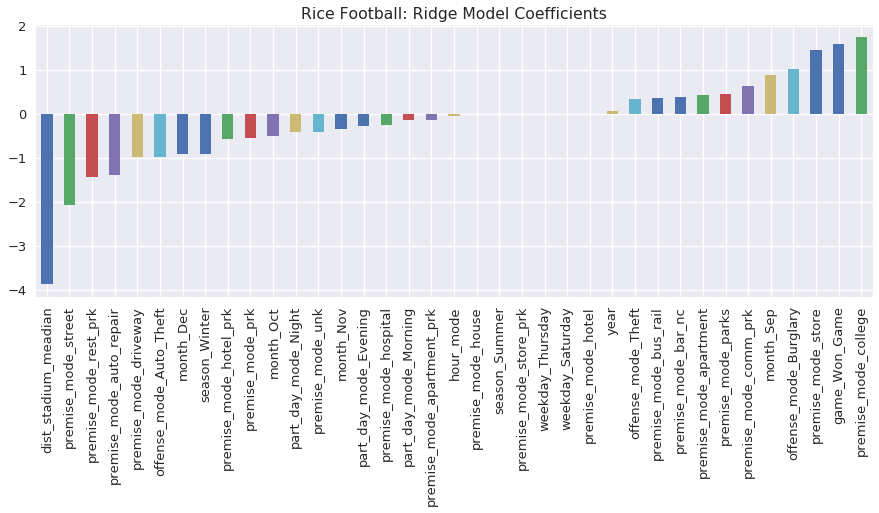

In [21]:
title = 'Rice Football: Ridge Model Coefficients'

modelfit(alg2,X,y)
coef2 = pd.Series(alg2.coef_, X_cols).sort_values()
coef2.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 1.357
CV Score : Mean  1.283 | Std  0.4084 | Min  0.7061 | Max  2.274


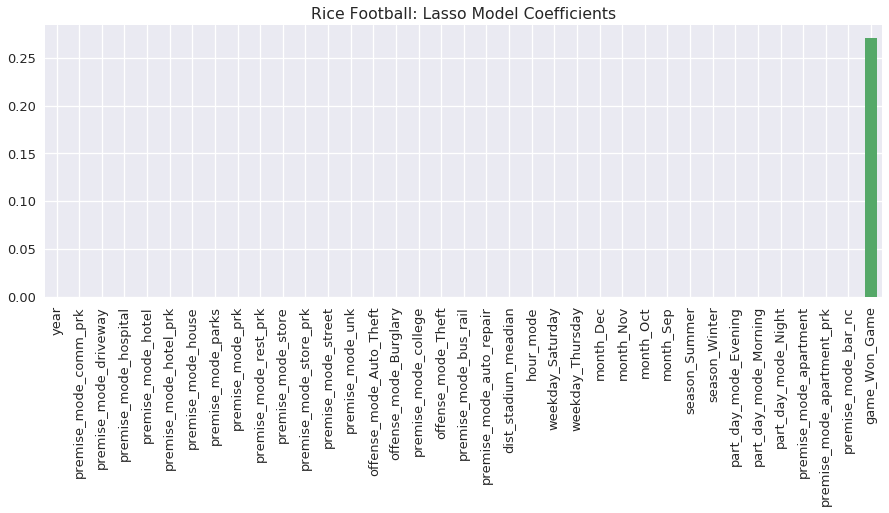

In [22]:


title = 'Rice Football: Lasso Model Coefficients'
modelfit(alg3,X,y)
coef3 = pd.Series(alg3.coef_, X_cols).sort_values()
coef3.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()